## Part 3: Comparing Manual K2 vs bnstruct MMHC search algorithms

In this section we **compare** the two learned structures and parameters on the same datasets (Ruiz, Asia, Child, Sachs) to the "TRUE" one obtained from the web by providing probability charts and plots and dag visualizations.

### Libraries & Data

In [1]:
#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# Required packages
#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
source("bnstruct_objects.R")

Bioconductor version '3.20' requires R version '4.4'; use `version = '3.18'`
  with R version 4.3; see https://bioconductor.org/install

Bioconductor version '3.20' is out-of-date; the current release version '3.21'
  is available with R version '4.5'; see https://bioconductor.org/install


Caricamento pacchetto: 'BiocGenerics'


I seguenti oggetti sono mascherati da 'package:stats':

    IQR, mad, sd, var, xtabs


I seguenti oggetti sono mascherati da 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min



Caricamento pacchetto: 'igraph'


I seguenti oggetti sono mascherati da 'package:graph':

    degree, edges, intersection, u

PHASE 1: Building Undirected Network...
Calculating Mutual Information...
Building initial network...
PHASE 2: Achieving Complete Connectivity...
Achieving complete connectivity...
PHASE 3: Refining Graph Structure...
Found 0 triangles to refine...
PHASE 4-7: Assigning Orientations...
PHASE 4: Conditional independence tests...
Completing orientations...
Extracting topological order...
PHASE 1: Building Undirected Network...
Calculating Mutual Information...
Building initial network...
PHASE 2: Achieving Complete Connectivity...
Achieving complete connectivity...


Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."


PHASE 3: Refining Graph Structure...
Found 0 triangles to refine...
PHASE 4-7: Assigning Orientations...
PHASE 4: Conditional independence tests...
Completing orientations...
Extracting topological order...


bnstruct :: performing imputation ...

bnstruct :: imputation finished.



PHASE 1: Building Undirected Network...
Calculating Mutual Information...
Building initial network...
PHASE 2: Achieving Complete Connectivity...
Achieving complete connectivity...


Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."
Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."
Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."


PHASE 3: Refining Graph Structure...
Found 0 triangles to refine...
PHASE 4-7: Assigning Orientations...
PHASE 4: Conditional independence tests...
Completing orientations...
Extracting topological order...


Rows: 10000 Columns: 11
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (11): Akt, Erk, Jnk, Mek, P38, PIP2, PIP3, PKA, PKC, Plcg, Raf

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


PHASE 1: Building Undirected Network...
Calculating Mutual Information...
Building initial network...
PHASE 2: Achieving Complete Connectivity...
Achieving complete connectivity...


Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."
Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."


PHASE 3: Refining Graph Structure...
Found 0 triangles to refine...
PHASE 4-7: Assigning Orientations...
PHASE 4: Conditional independence tests...
Completing orientations...
Extracting topological order...


bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



#### Import True Network Structures

In [2]:
#BN structures from documentation.
ruiz.true.dag <- model2network("[x1][x2|x1][x3|x2]")
asia.true.dag <- bn.net(bnlearn::read.bif("asia/asia.bif"))
child.true.dag <- bn.net(bnlearn::read.bif("child/child.bif"))
sachs.true.dag <- bn.net(bnlearn::read.bif("sachs/sachs.bif"))

#### `BN` (bnstruct) to `bn` (bnlearn) object

In [3]:
bnstruct_to_bnlearn <- function(bnstruct_net) {
  vars <- variables(bnstruct_net)
  adj  <- dag(bnstruct_net)
  bn   <- empty.graph(nodes=vars)
  for(i in seq_along(vars)) for(j in seq_along(vars))
    if(adj[i,j]==1) 
      bn <- set.arc(bn, from=vars[i], to=vars[j])
  bn
}

#### Align nodes names

In [4]:
align_node_names <- function(bn_old, bn_new) {
  old_names <- nodes(bn_old)
  ref_names <- nodes(bn_new)
  new_names <- sapply(old_names, function(o) {
    idx1 <- which(tolower(substr(ref_names, 1, 1)) == tolower(substr(o, 1, 1)))
    if (length(idx1) == 1) return(ref_names[idx1])
    idx2 <- which(tolower(substr(ref_names, 1, 2)) == tolower(substr(o, 1, 2)))
    if (length(idx2) == 1) return(ref_names[idx2])
    idx3 <- match(tolower(o), tolower(ref_names))
    if (!is.na(idx3)) return(ref_names[idx3])
    o
  }, USE.NAMES = FALSE)
  nodes(bn_old) <- new_names
  new_names
  return(bn_old)
}

In [5]:
ruiz_bs_bn <- bnstruct_to_bnlearn(ruiz_net_bs)
asia_bs_bn <- bnstruct_to_bnlearn(asia_net_bs)
child_bs_bn <- bnstruct_to_bnlearn(child_net_bs)
sachs_bs_bn <- bnstruct_to_bnlearn(sachs_net_bs)

In [6]:
old.names.nets <- list(asia.true.dag, child.true.dag)
new.names.nets <- list(asia_bs_bn,   child_bs_bn)

asia.true.dag.aligned <- align_node_names(
    old.names.nets[[1]], new.names.nets[[1]]
  )
child.true.dag.aligned <- align_node_names(
    old.names.nets[[2]], new.names.nets[[2]]
  )

## Comparison

### Charts

In [7]:
ruiz.true.params <- bn.fit(
    x=ruiz.true.dag,
    data=ruiz_df_fac,
    method="bayes"
)
ruiz.true.params$x1
ruiz.true.params$x2
ruiz.true.params$x3


  Parameters of node x1 (multinomial distribution)

Conditional probability table:
   1   2 
0.5 0.5 


  Parameters of node x2 (multinomial distribution)

Conditional probability table:
 
   x1
x2          1         2
  1 0.7727273 0.2272727
  2 0.2272727 0.7727273


  Parameters of node x3 (multinomial distribution)

Conditional probability table:
 
   x2
x3           1          2
  1 0.77272727 0.04545455
  2 0.22727273 0.95454545

x1,x2,x3
<fct>,<fct>,<fct>
2,1,1
2,2,2
1,1,2
2,2,2
1,1,1
1,2,2
2,2,2
1,1,1
2,2,2


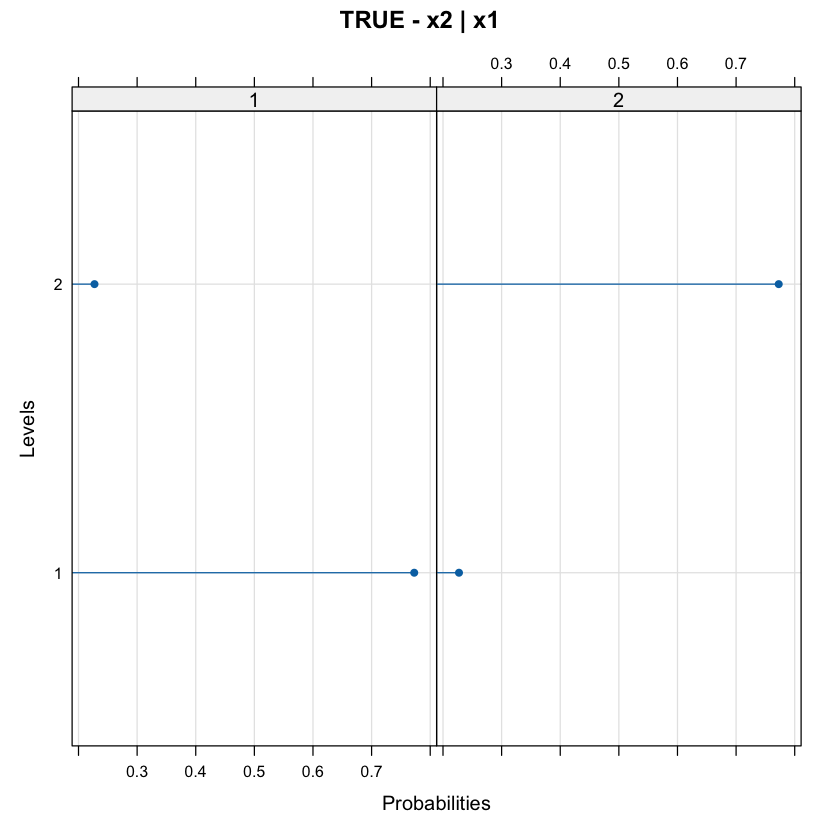

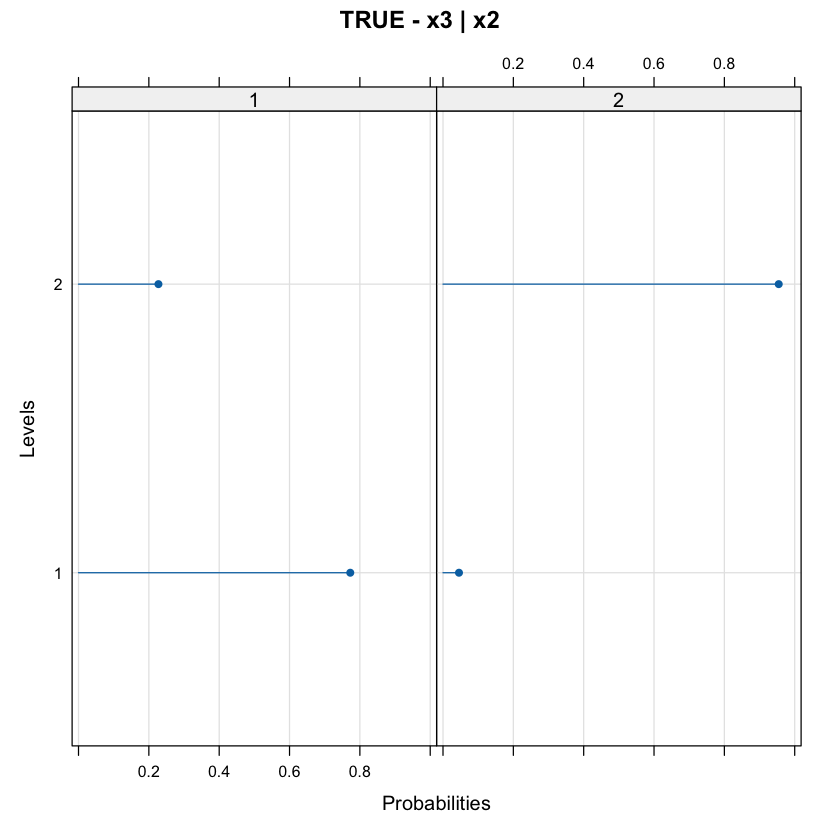

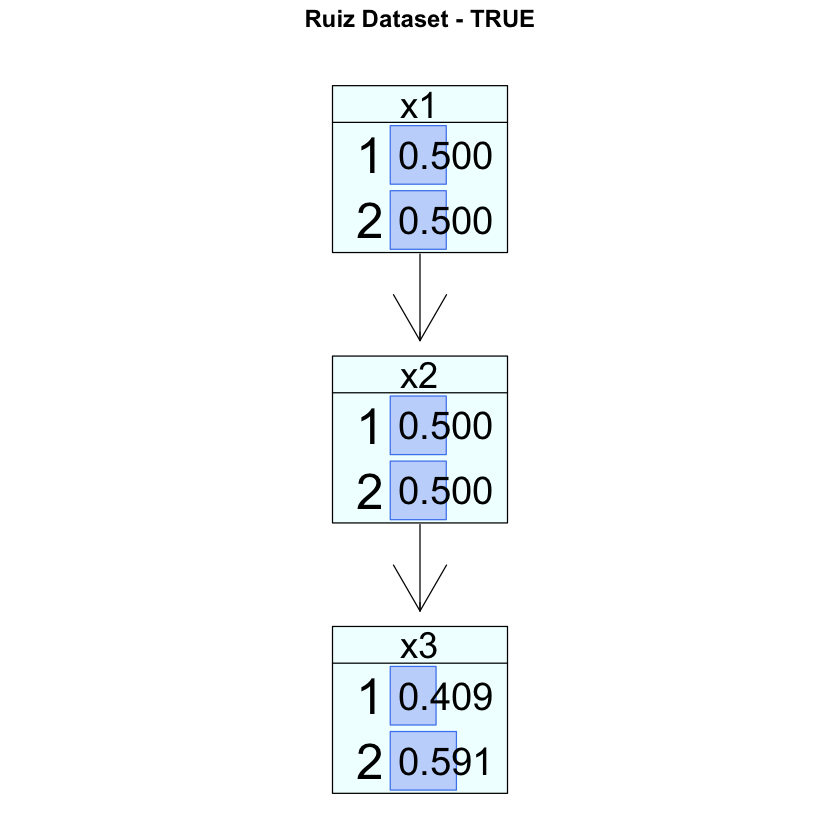

In [8]:
ruiz_df_fac

bn.fit.dotplot(
    ruiz.true.params$x2, 
    xlab = "Probabilities", ylab = "Levels", 
    main="TRUE - x2 | x1"
)

bn.fit.dotplot(
    ruiz.true.params$x3, 
    xlab = "Probabilities", ylab = "Levels", 
    main="TRUE - x3 | x2"
)

graphviz.chart(
    ruiz.true.params, 
    type = "barprob", layout = "dot", 
    draw.labels = TRUE, grid = FALSE, scale = c(1.5, 1.5), 
    col = "black", bg = "azure", text.col = "black", bar.col = "#115de9", 
    main = "Ruiz Dataset - TRUE"
)

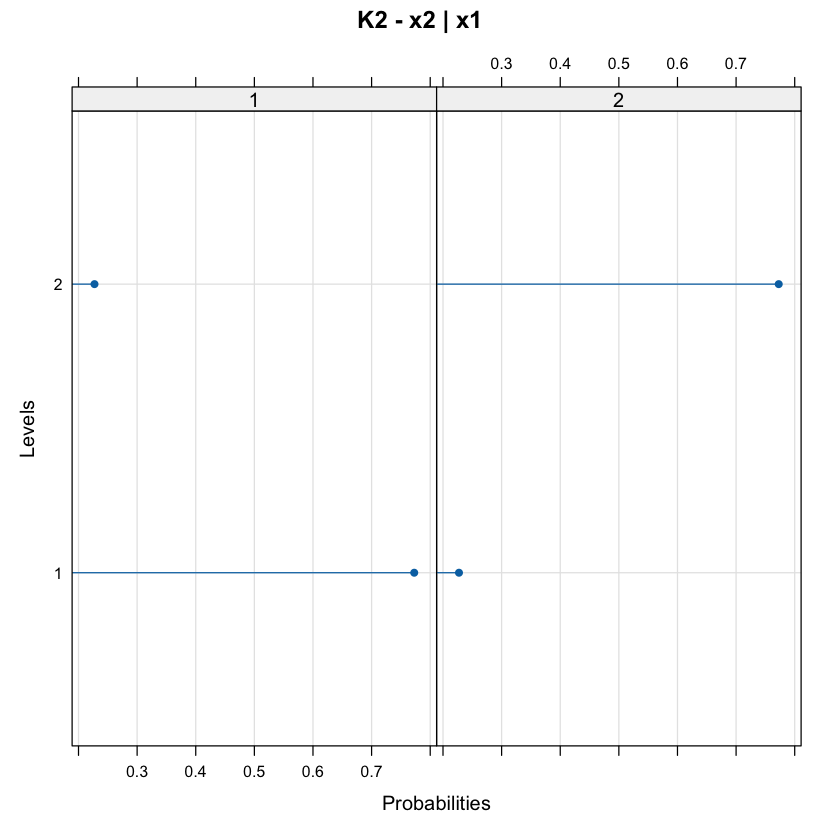

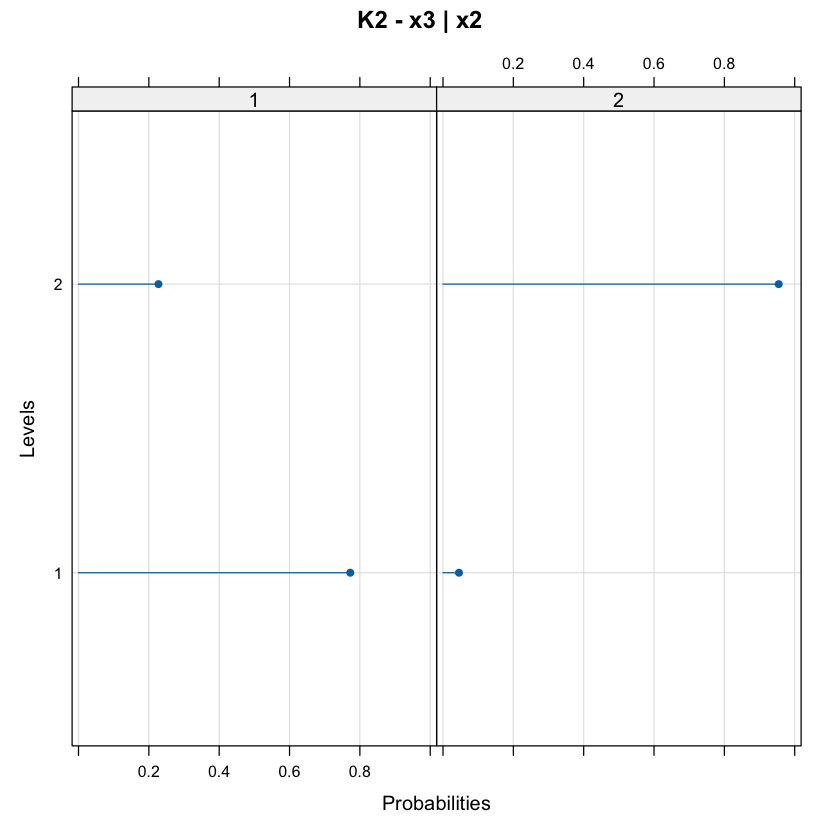

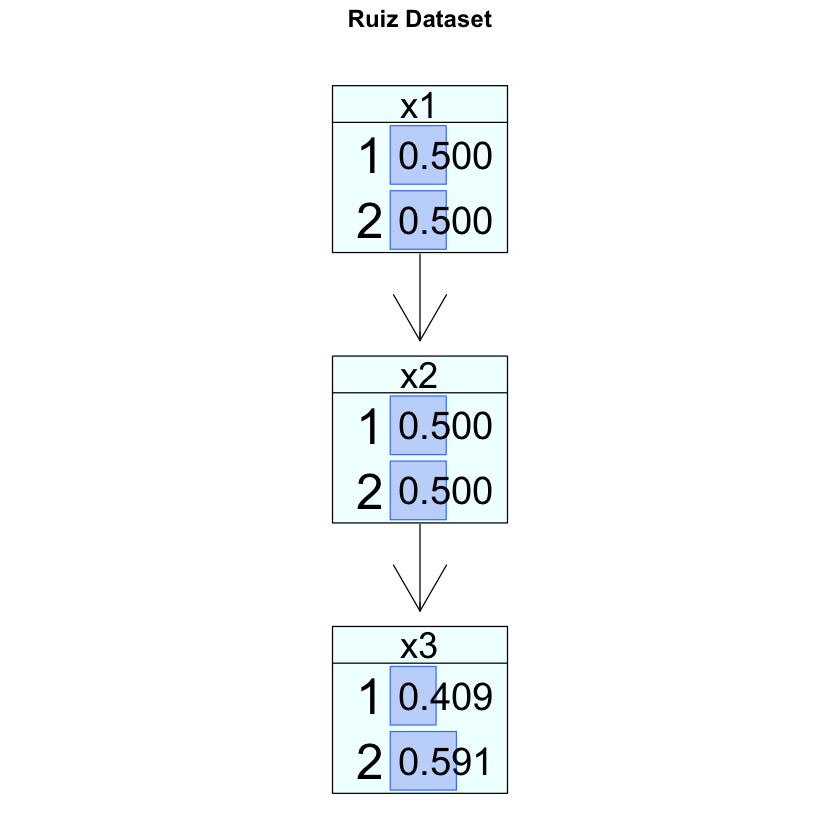

In [9]:
ruiz.k2.params <- bn.fit(
    x=ruiz_net$dag,
    data=ruiz_df_fac,
    method="bayes"
)

bn.fit.dotplot(
    ruiz.k2.params$x2, 
    xlab = "Probabilities", ylab = "Levels", 
    main="K2 - x2 | x1"
)

bn.fit.dotplot(
    ruiz.k2.params$x3, 
    xlab = "Probabilities", ylab = "Levels", 
    main="K2 - x3 | x2"
)

graphviz.chart(
    ruiz.k2.params, 
    type = "barprob", layout = "dot", 
    draw.labels = TRUE, grid = FALSE, scale = c(1.5, 1.5), 
    col = "black", bg = "azure", text.col = "black", bar.col = "#115de9", 
    main = "Ruiz Dataset"
)

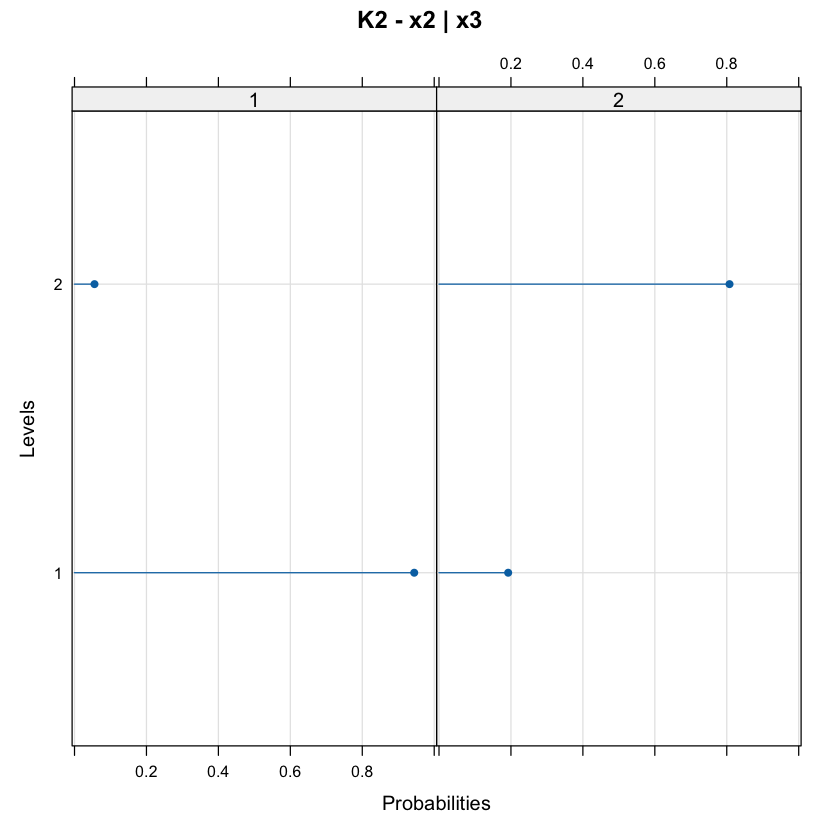

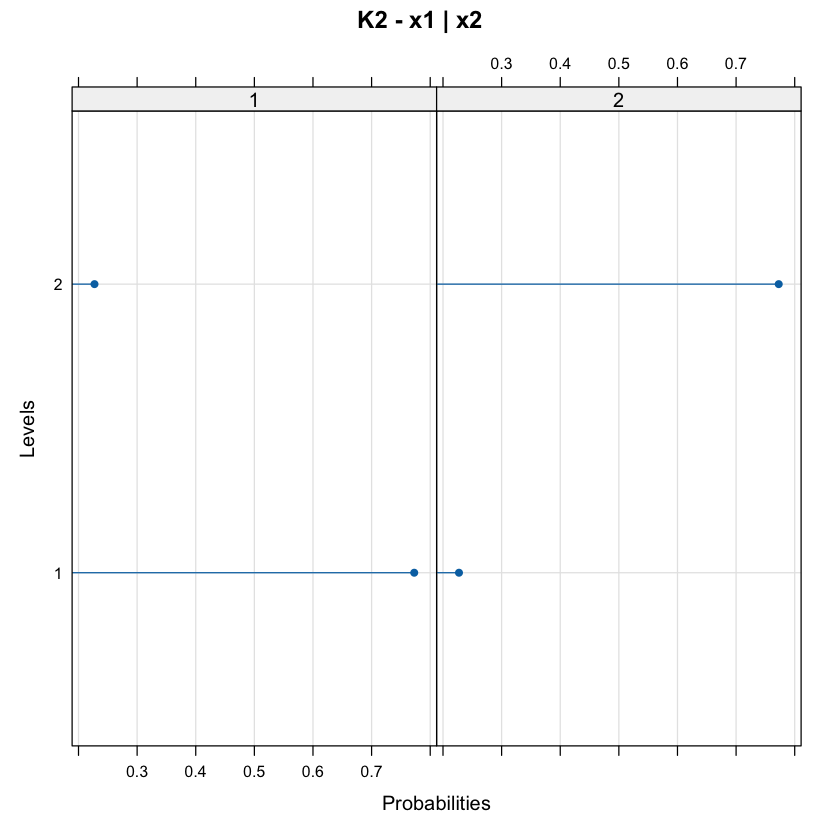

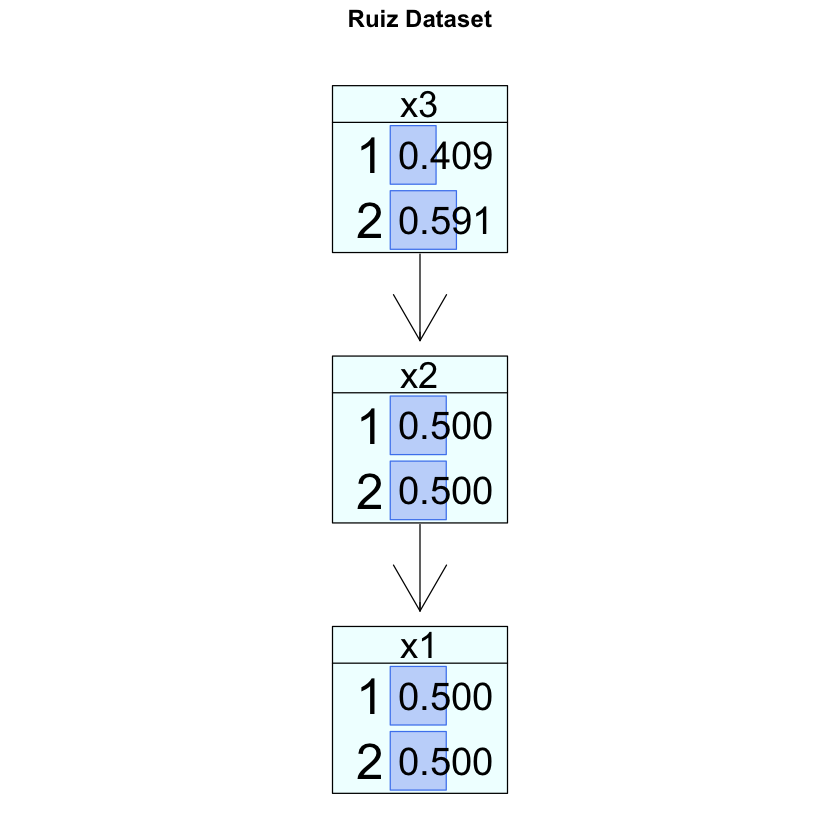

In [10]:
ruiz.mmhc.params <- bn.fit(
    x=ruiz_bs_bn,
    data=ruiz_df_fac,
    method="bayes"
)

bn.fit.dotplot(
    ruiz.mmhc.params$x2, 
    xlab = "Probabilities", ylab = "Levels", 
    main="K2 - x2 | x3"
)

bn.fit.dotplot(
    ruiz.mmhc.params$x1, 
    xlab = "Probabilities", ylab = "Levels", 
    main="K2 - x1 | x2"
)

graphviz.chart(
    ruiz.mmhc.params, 
    type = "barprob", layout = "dot", 
    draw.labels = TRUE, grid = FALSE, scale = c(1.5, 1.5), 
    col = "black", bg = "azure", text.col = "black", bar.col = "#115de9", 
    main = "Ruiz Dataset"
)

Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in doTryCatch(return(expr), name, parentenv, handler):
"zero-length arrow is of indeterminate angle and so skipped"


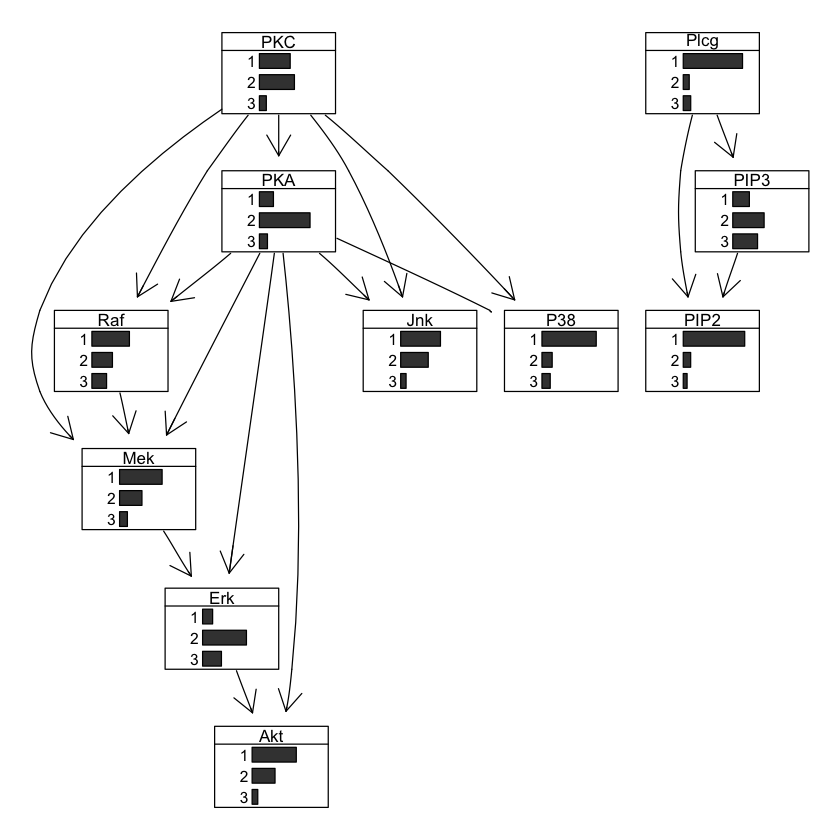

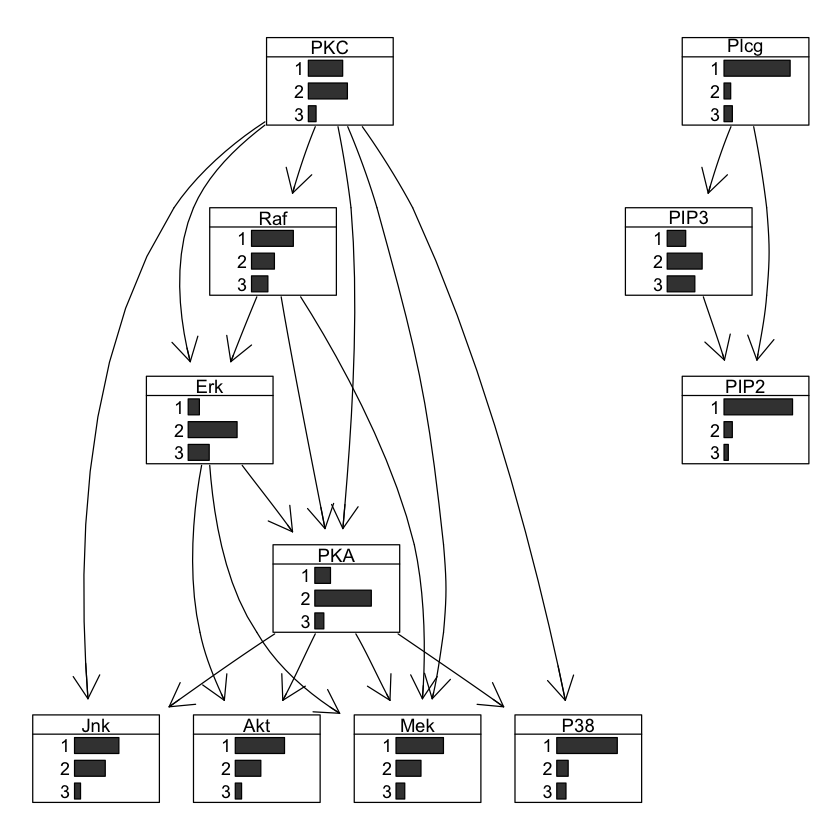

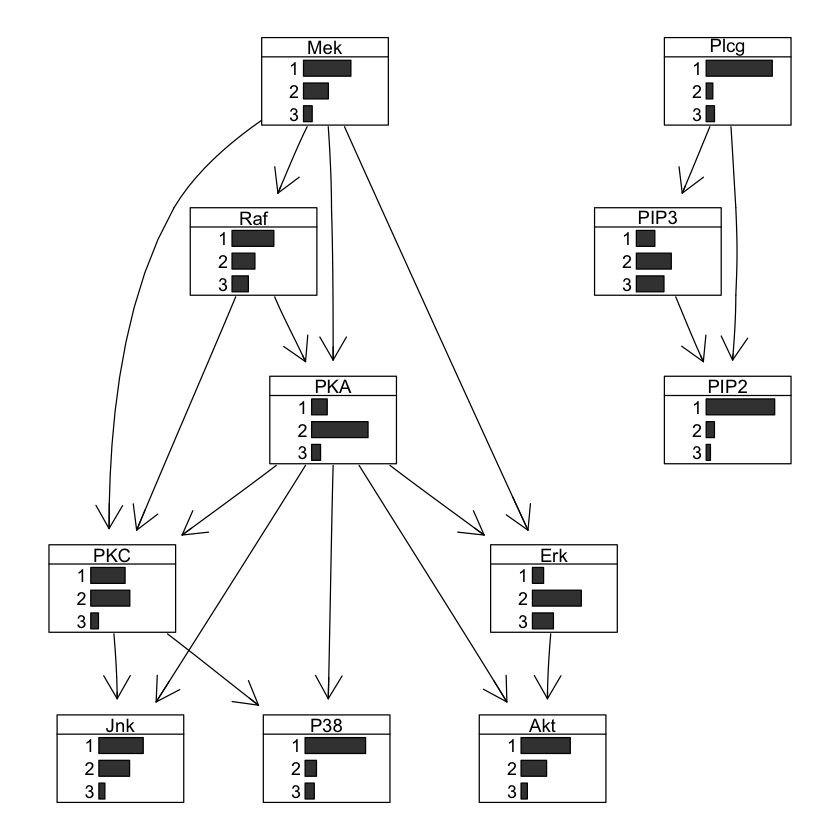

In [11]:
sachs.true.params <- bn.fit(
    x=sachs.true.dag,
    data=sachs_df_fac,
    method="bayes")
sachs.k2.params <- bn.fit(
    x=sachs_net$dag,
    data=sachs_df_fac,
    method="bayes")
sachs.mmhc.params <- bn.fit(
    x=sachs_bs_bn,
    data=sachs_df_fac,
    method="bayes")
bnlearn::graphviz.chart(
    sachs.true.params
)
bnlearn::graphviz.chart(
    sachs.k2.params
)
bnlearn::graphviz.chart(
    sachs.mmhc.params
)

### Plots

#### Ruiz

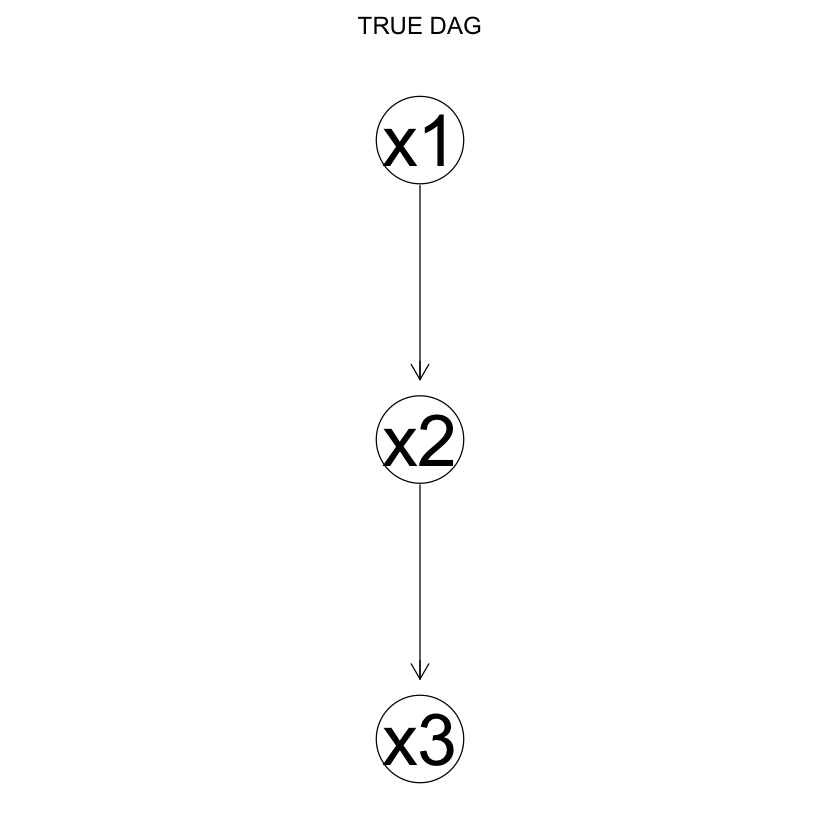

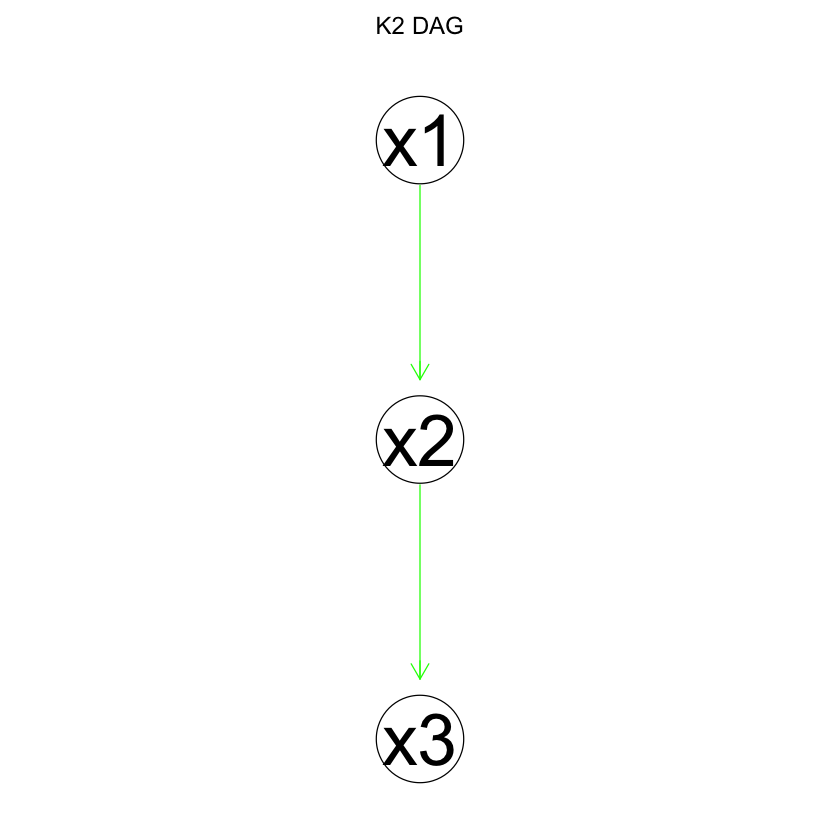

In [12]:
######## K2 ########
graphviz.compare(
    ruiz.true.dag, ruiz_net$dag, 
    layout="dot", 
    shape="circle", 
    diff.args=list(tp.col="green", tp.lty="solid", fp.col="red", fp.lty="solid", fn.col="blue", fn.lty="dashed"),
    main = c("TRUE DAG", "K2 DAG"))

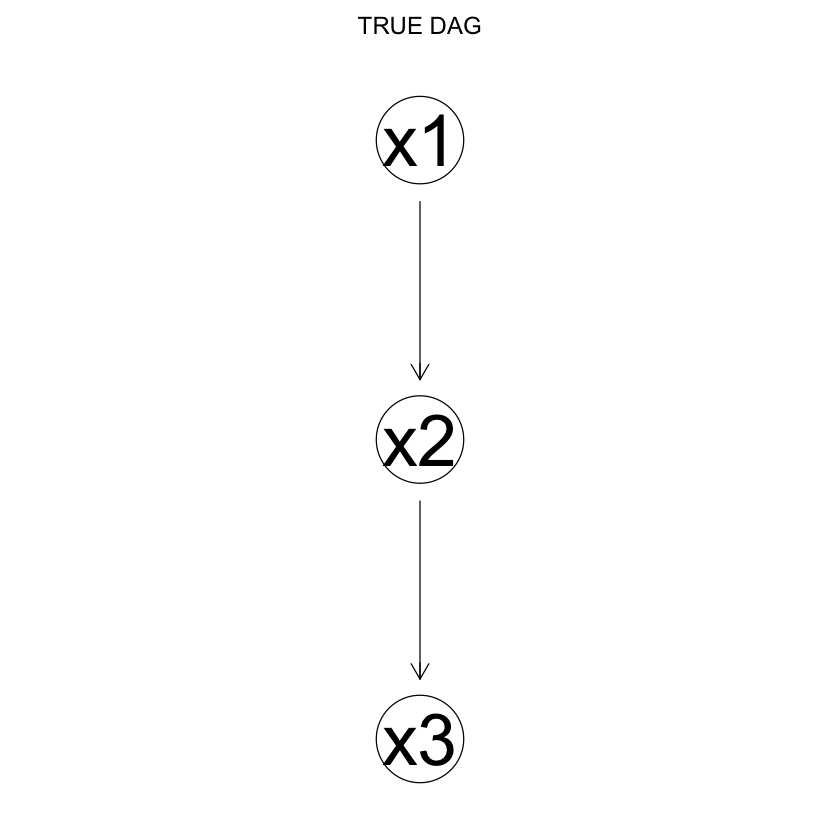

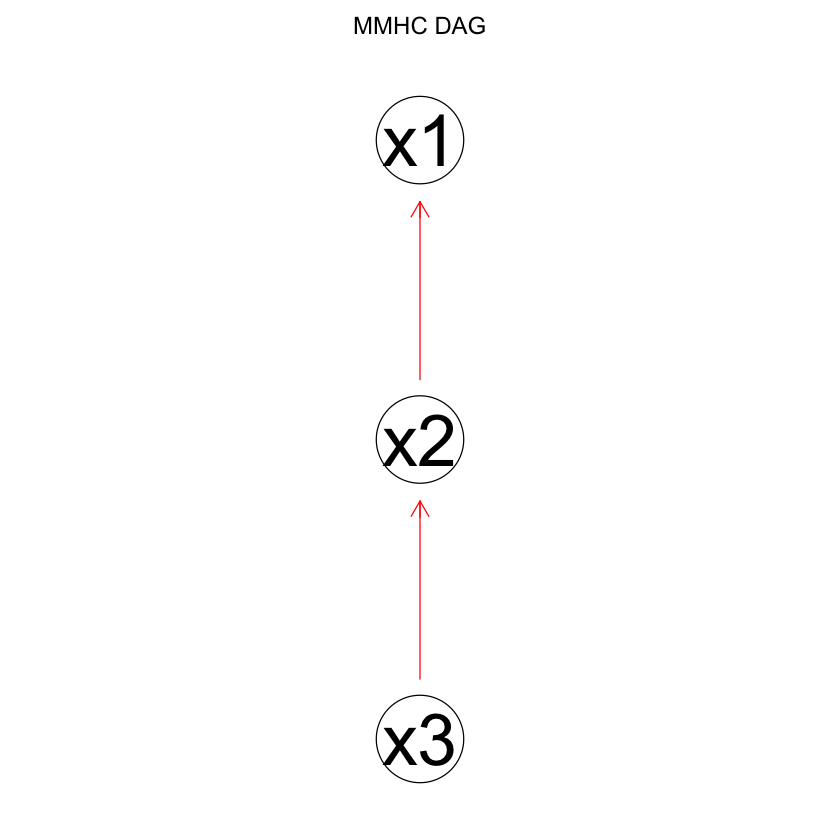

In [13]:
######## bnstruct ########
graphviz.compare(
    ruiz.true.dag, ruiz_bs_bn, 
    shape="circle", 
    diff.args=list(tp.col="green", tp.lty="solid", fp.col="red", fp.lty="solid", fn.col="blue", fn.lty="dashed"),
    main = c("TRUE DAG", "MMHC DAG")
)

#### Asia

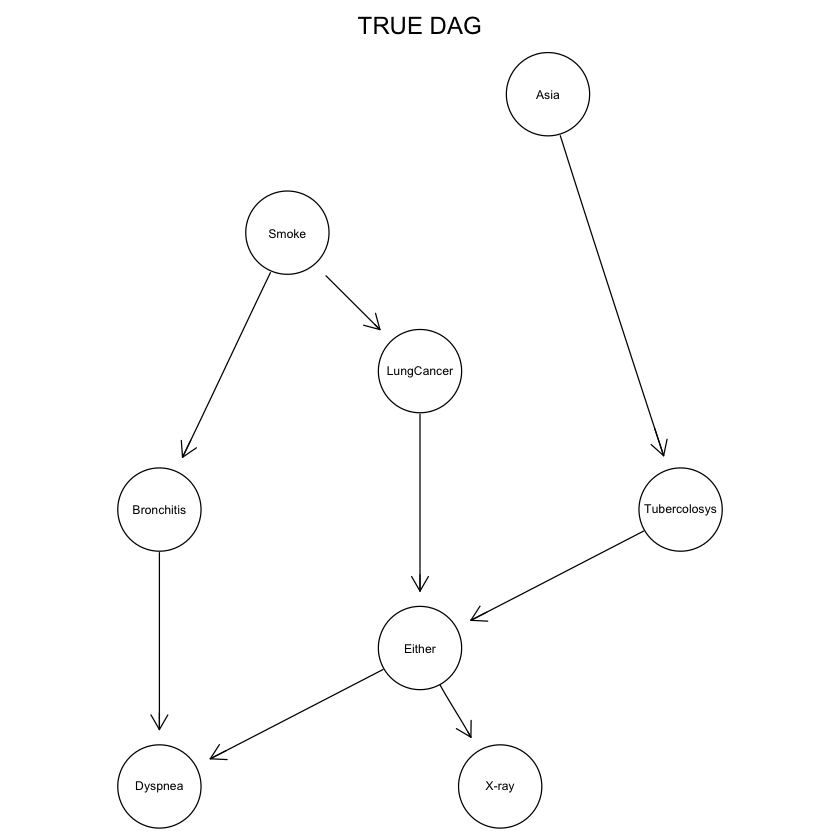

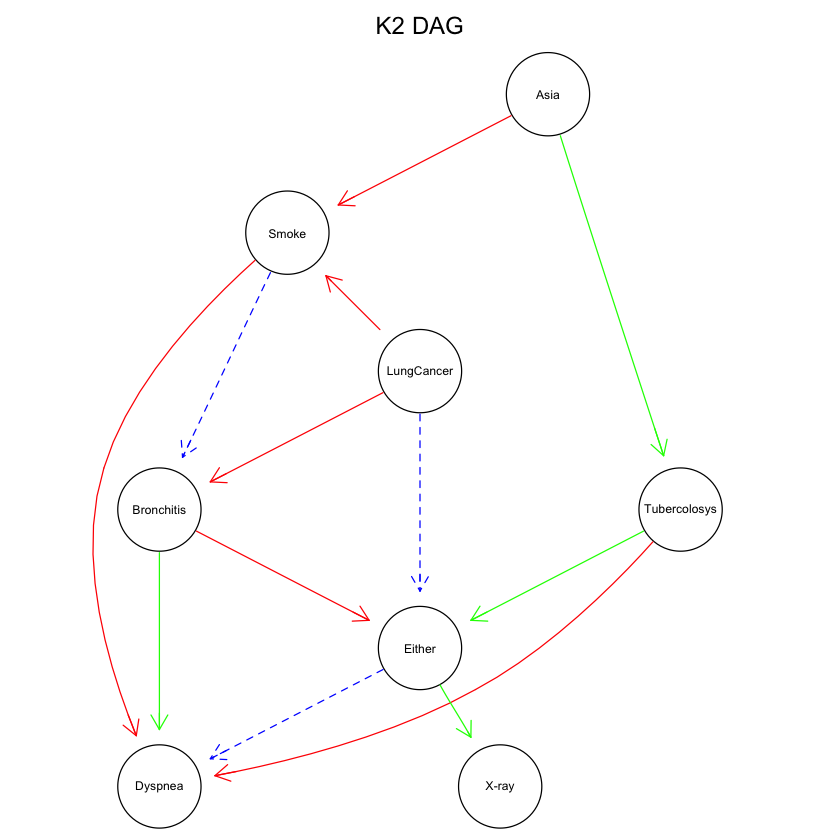

In [14]:
### K2 ####
graphviz.compare(
    asia.true.dag.aligned, asia_net$dag,
    layout="dot", shape="circle", 
    diff.args=list(tp.col="green", tp.lty="solid", fp.col="red", fp.lty="solid", fn.col="blue", fn.lty="dashed"),
    main = c("TRUE DAG", "K2 DAG")
)

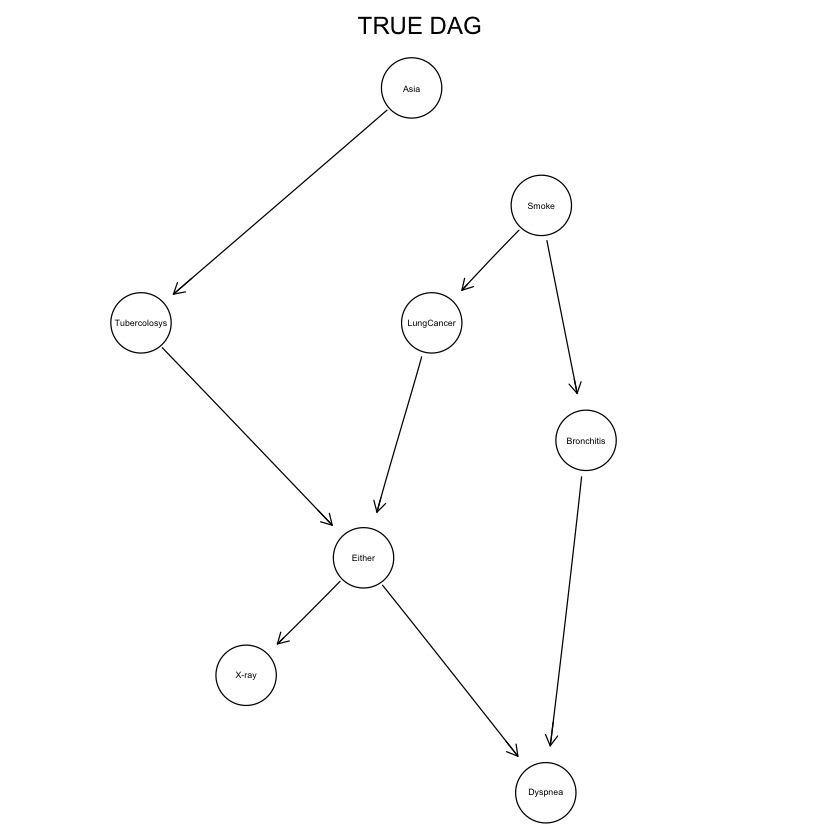

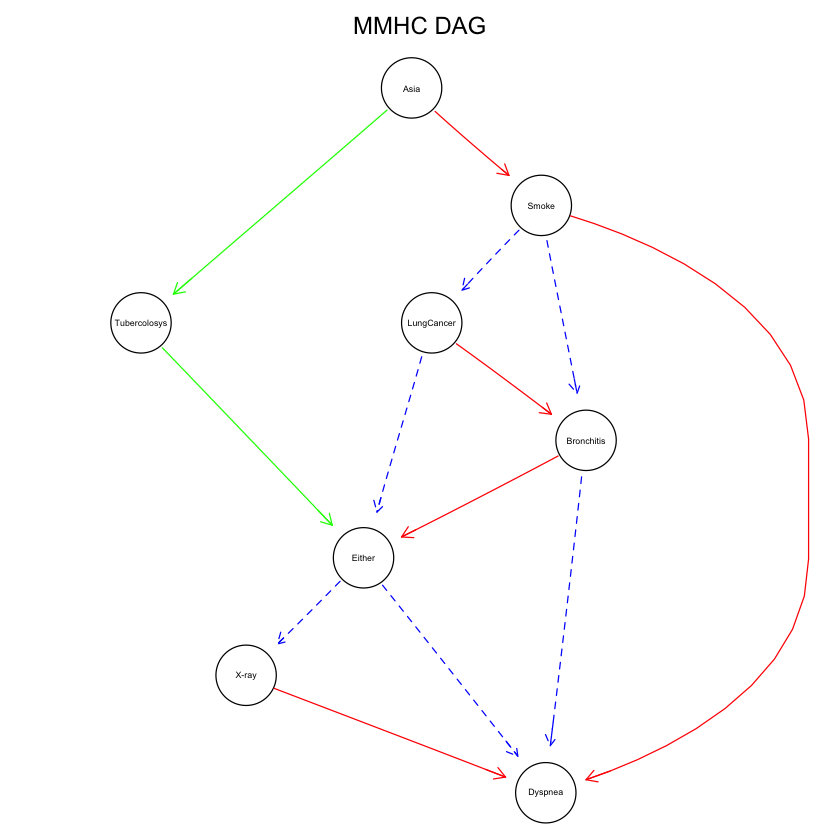

In [15]:
### bnstruct ####
graphviz.compare(
    asia.true.dag.aligned, asia_bs_bn,
    shape="circle",
    diff.args=list(tp.col="green", tp.lty="solid", fp.col="red", fp.lty="solid", fn.col="blue", fn.lty="dashed"), 
    main = c("TRUE DAG", "MMHC DAG"))

#### Child

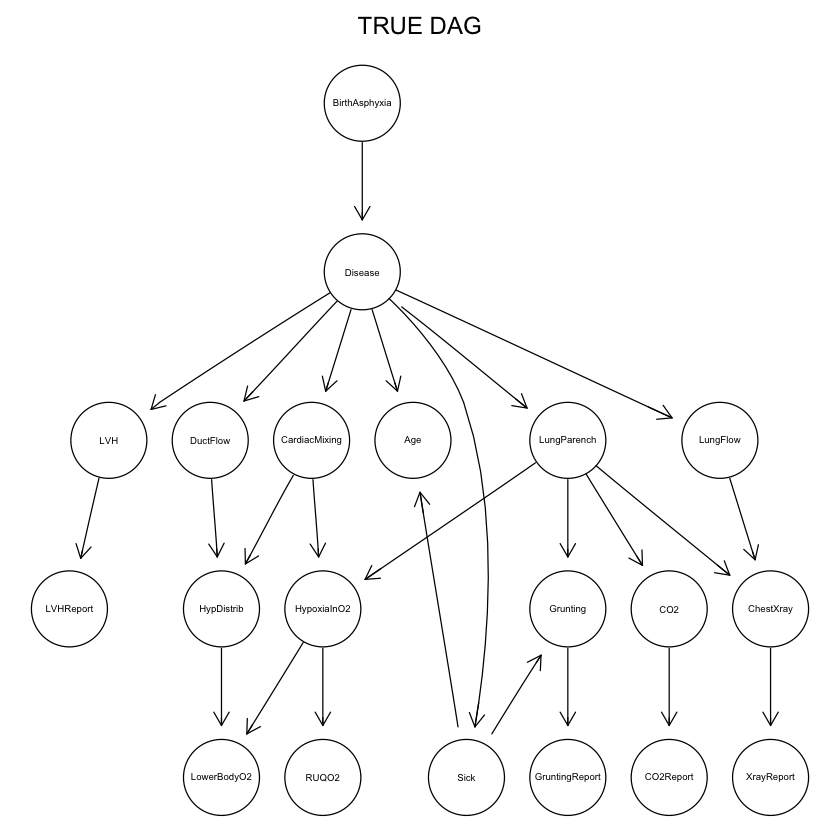

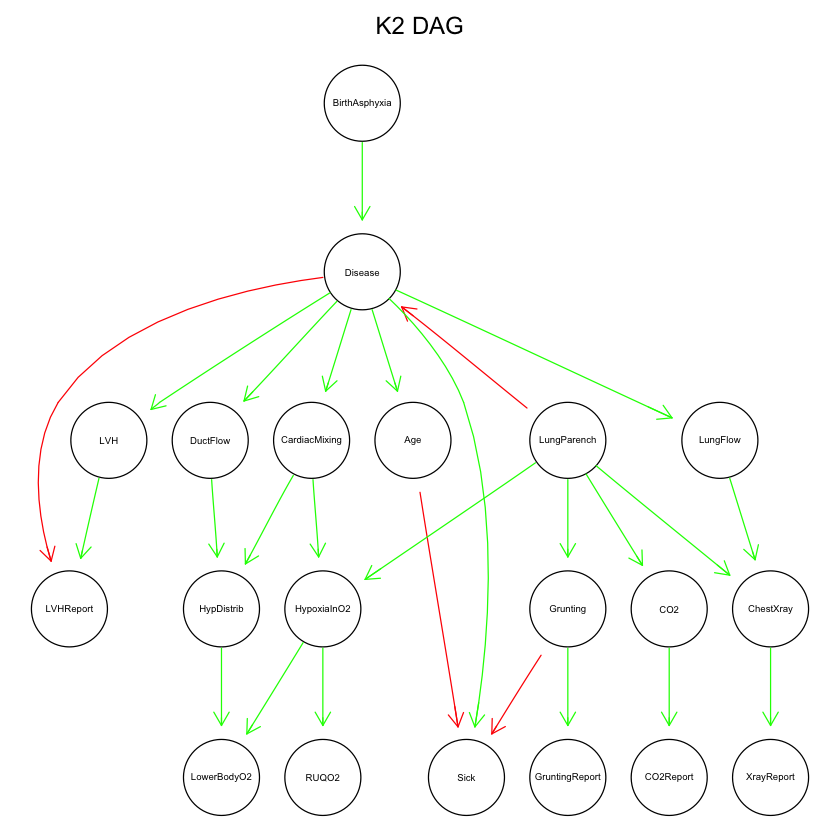

In [16]:
##### K2 #####
graphviz.compare(
    child.true.dag.aligned, child_net$dag, 
    layout= "dot", shape="circle",
    diff.args=list(tp.col="green", tp.lty="solid", fp.col="red", fp.lty="solid", fn.col="blue", fn.lty="dashed"),
    main = c("TRUE DAG", "K2 DAG")
)

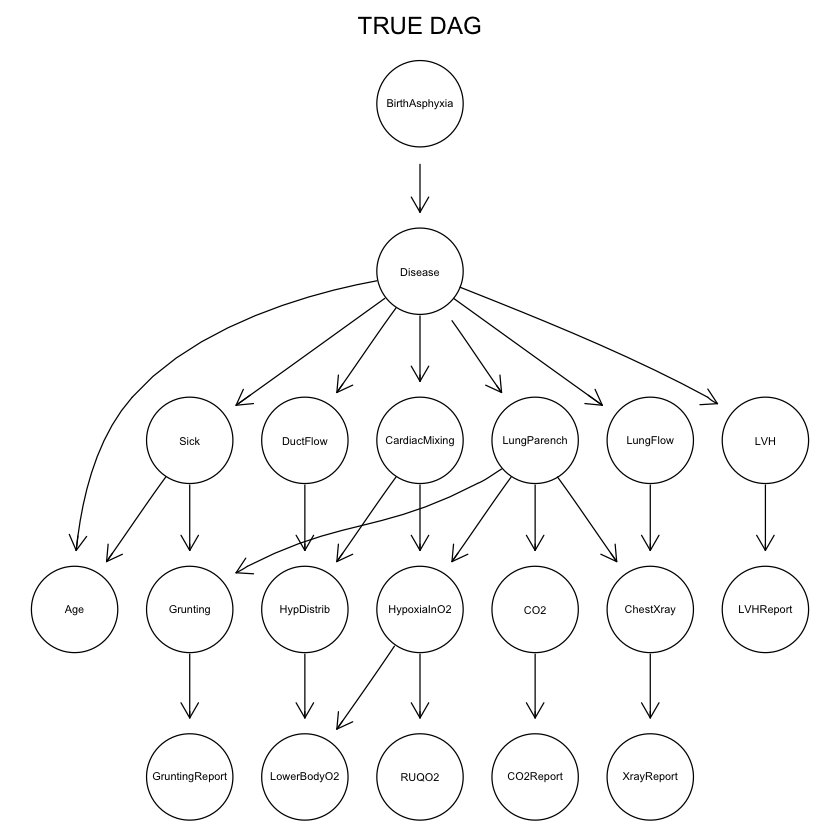

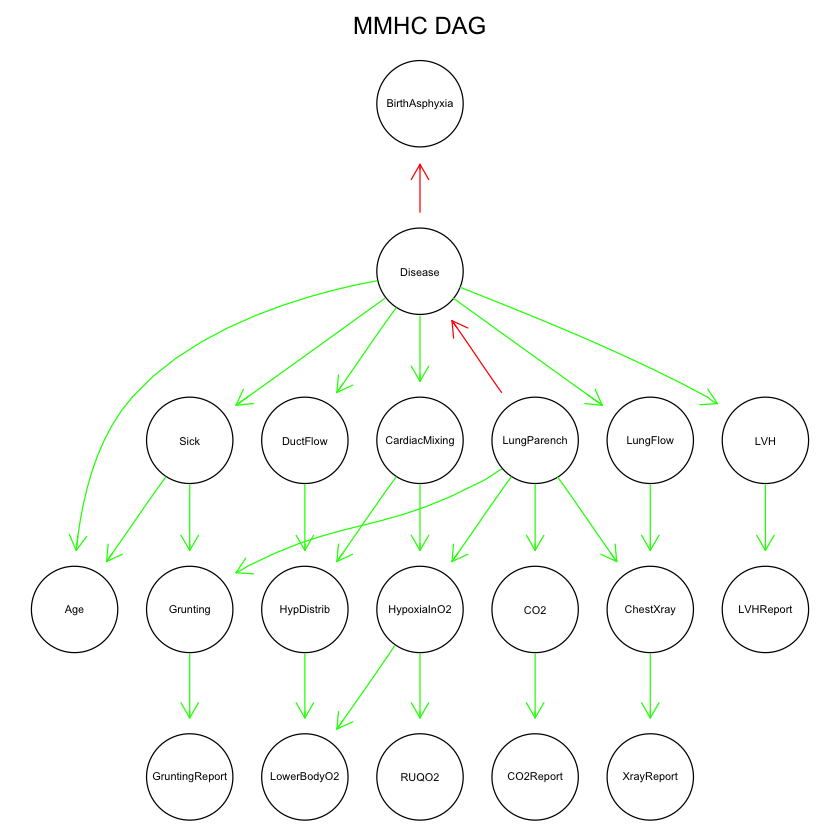

In [17]:
##### bnstruct #####
graphviz.compare(
    child.true.dag.aligned, child_bs_bn, 
    layout="dot", shape="circle", 
    diff.args=list(tp.col="green", tp.lty="solid", fp.col="red", fp.lty="solid", fn.col="blue", fn.lty="dashed"),
    main = c("TRUE DAG", "MMHC DAG")
)

#### SACHS

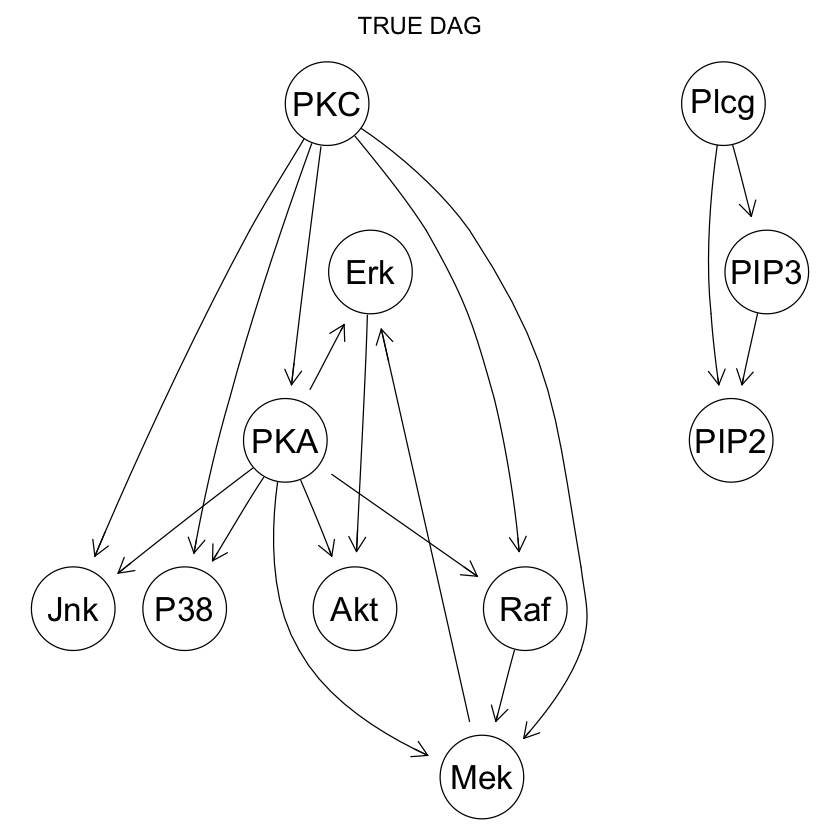

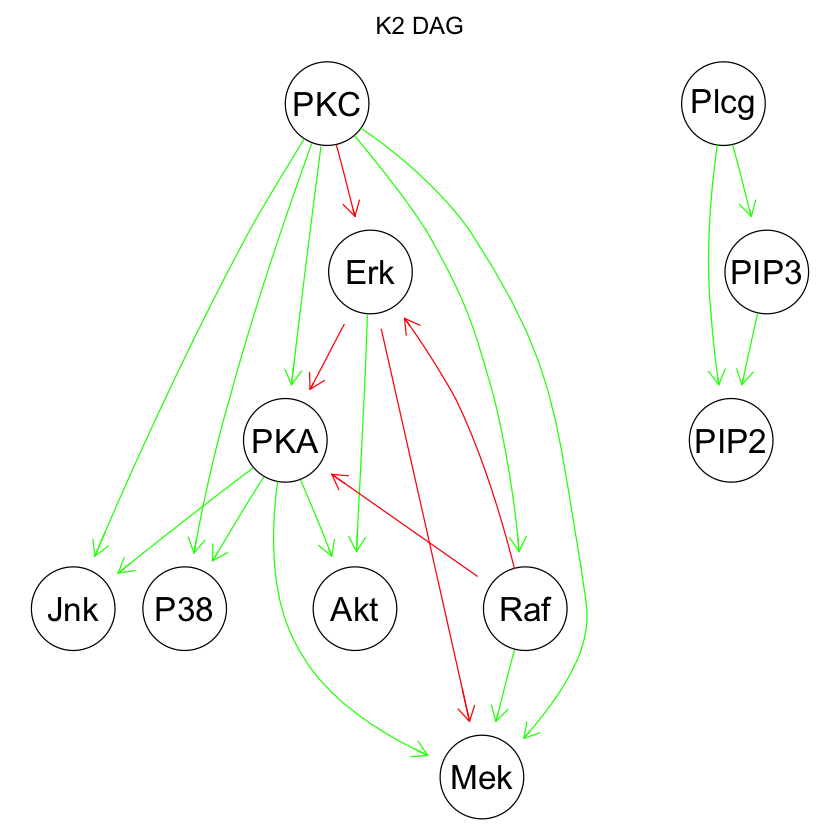

In [18]:
graphviz.compare(
    sachs.true.dag, sachs_net$dag, 
    layout="dot", shape="circle", 
    diff.args=list(tp.col="green", tp.lty="solid", fp.col="red", fp.lty="solid", fn.col="blue", fn.lty="dashed"),
    main = c("TRUE DAG", "K2 DAG"))

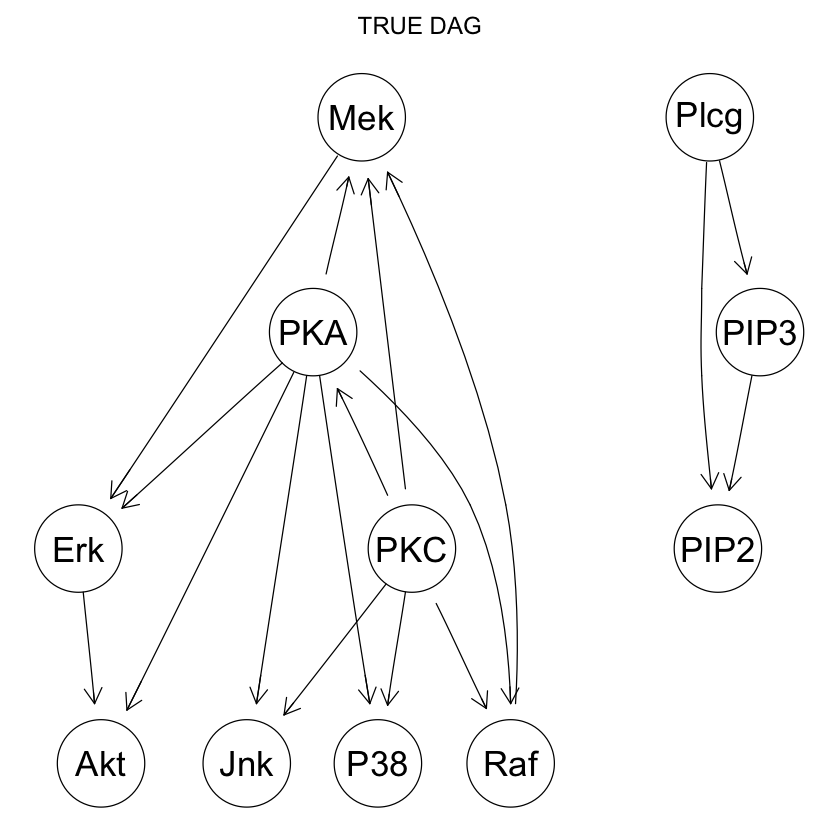

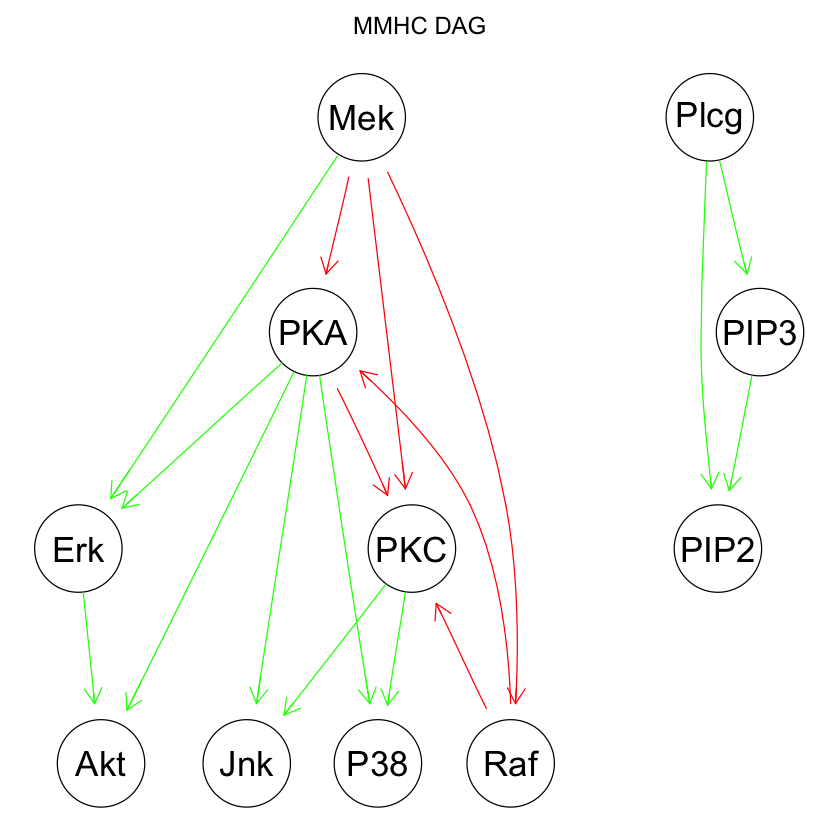

In [19]:
graphviz.compare(
    sachs.true.dag, sachs_bs_bn, 
    layout="dot", shape="circle", 
    diff.args=list(tp.col="green", tp.lty="solid", fp.col="red", fp.lty="solid", fn.col="blue", fn.lty="dashed"),
    main = c("TRUE DAG", "MMHC DAG")
)

### Metrics
As metrics we use:
1. As **statistical score**, the **BDeu** (marginal likelihood under BD equivalent uniform prior) 

2. As **Structural metrics**:
   - **Structural Hamming Distance** (SHD)
   - **Precision / Recall / F1**

We use the **bnlearn** package to compute all of these.

---

#### Scores

In [20]:
iss <- 10
bdeu.ruiz.true <- score(ruiz.true.dag, ruiz_df_fac, type = "bde", iss = iss)
bdeu.ruiz.k2 <- score(ruiz_net$dag, ruiz_df_fac, type = "bde", iss = iss)
bdeu.ruiz.bs <- score(ruiz_bs_bn, ruiz_df_fac, type = "bde", iss = iss)

data.frame("Score-BDeu" = c(bdeu.ruiz.true, bdeu.ruiz.k2, bdeu.ruiz.bs), row.names = c("True", "K2", "MMHC"))

,Score.BDeu
,<dbl>
True,-19.65341
K2,-19.65341
MMHC,-19.65341


In [21]:
bdeu.child.true <- score(child.true.dag.aligned, child_df_fac, type = "bde", iss = iss)
bdeu.child.k2 <- score(child_net$dag, child_df_fac, type = "bde", iss = iss)
bdeu.child.bs <- score(child_bs_bn, child_df_fac, type = "bde", iss = iss)

data.frame("Score-BDeu"=c(bdeu.child.true, bdeu.child.k2, bdeu.child.bs), row.names = c("True", "K2", "MMHC"))

,Score.BDeu
,<dbl>
True,-59676.08
K2,-59762.85
MMHC,-59676.08


In [22]:
bdeu.asia.true <- score(asia.true.dag.aligned, asia_df_fac, type = "bde", iss = iss)
bdeu.asia.k2 <- score(asia_net$dag, asia_df_fac, type = "bde", iss = iss)
bdeu.asia.bs <- score(asia_bs_bn, asia_df_fac, type = "bde", iss = iss)

data.frame("Score-BDeu" = c(bdeu.asia.true, bdeu.asia.k2, bdeu.asia.bs), row.names = c("True", "K2", "MMHC"))

,Score.BDeu
,<dbl>
True,-26093.91
K2,-22517.38
MMHC,-24244.45


In [23]:
bdeu.sachs.true <- score(sachs.true.dag, sachs_df_fac, type = "bic", iss = iss)
bdeu.sachs.k2 <- score(sachs_net$dag, sachs_df_fac, type = "bde", iss = iss)
bdeu.sachs.bs <- score(sachs_bs_bn, sachs_df_fac, type = "bde", iss = iss)

data.frame("Score-BDeu"=c(bdeu.sachs.true, bdeu.sachs.k2, bdeu.sachs.bs), row.names = c("True", "K2", "MMHC"))

Warning message in check.unused.args(extra.args, score.extra.args[[score]]):
"unused argument(s): 'iss'."


,Score.BDeu
,<dbl>
True,-72448.71
K2,-72362.69
MMHC,-72129.58


#### Structural Hamming Distance (SHD)
The Structural Hamming Distance between two DAGs $(G_1,G_2)$ is
$$
\mathrm{SHD}(G_1,G_2)=\bigl|{(i,j):A_1(i,j)\neq A_2(i,j)}\bigr|,
$$
that is the distance, between two adjacency matrices in terms of edges, between two network structures. The lower the shd, the more similar are the two network structures.

In [24]:
###### METRICS ######
shd_ruiz.k2  <- bnlearn::shd(ruiz_net$dag, ruiz.true.dag)
shd_ruiz.bs <- bnlearn::shd(ruiz_bs_bn, ruiz.true.dag)

shd_asia.k2  <- bnlearn::shd(asia_net$dag, asia.true.dag.aligned)
shd_asia.bs <- bnlearn::shd(asia_bs_bn, asia.true.dag.aligned)

shd_child.k2 <- bnlearn::shd(child_net$dag, child.true.dag.aligned)
shd_child.bs <- bnlearn::shd(child_bs_bn, child.true.dag.aligned)

shd_sachs.k2 <- bnlearn::shd(sachs_net$dag, sachs.true.dag)
shd_sachs.bs <- bnlearn::shd(sachs_bs_bn, sachs.true.dag)

results <- data.frame(
  Dataset = rep(c("Ruiz","Asia","Child","Sachs"), each = 2),
  Method  = rep(c("K2","MMHC"), times = 4),
  SHD     = c(
    shd_ruiz.k2,  shd_ruiz.bs,
    shd_asia.k2,  shd_asia.bs,
    shd_child.k2, shd_child.bs,
    shd_sachs.k2, shd_sachs.bs
  ),
  row.names = NULL
)
results

Dataset,Method,SHD
<chr>,<chr>,<int>
Ruiz,K2,0
Ruiz,MMHC,0
Asia,K2,9
Asia,MMHC,11
Child,K2,13
Child,MMHC,0
Sachs,K2,2
Sachs,MMHC,0


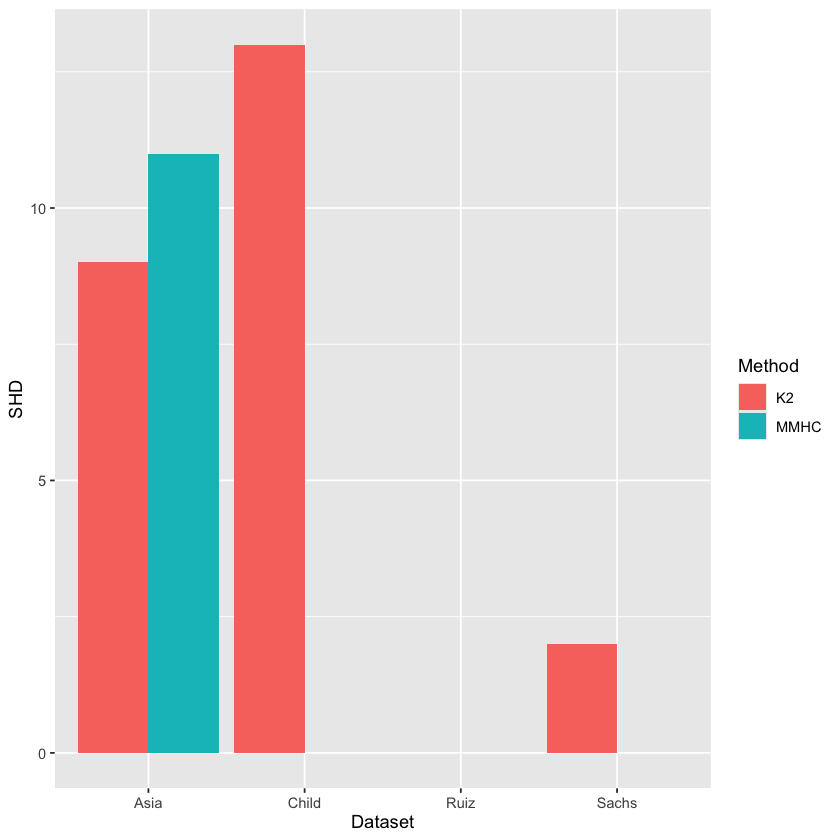

In [25]:
ggplot(results, aes(x = Dataset, y = SHD, fill = Method)) +
  geom_col(position="dodge")

#### Edge Counts & Precision/Recall

Let
$$
E_1,E_2
$$
be the arc‐sets.  Then:
$$
\text{TP} = |E_1\cap E_2|,\quad
\text{FP} = |E_2\setminus E_1|,\quad
\text{FN} = |E_1\setminus E_2|.
$$
+ Precision ($= \tfrac{TP}{TP+FP}$,)
+ Recall ($= \tfrac{TP}{TP+FN}$,)
+ F1 Score ($=2\frac{PR}{P+R}$).

In [26]:
compare.ruiz.k2 <- compare(ruiz.true.dag, ruiz_net$dag)
compare.ruiz.bs <- compare(ruiz.true.dag, ruiz_bs_bn)
compare.asia.k2 <- compare(asia.true.dag.aligned, asia_net$dag)
compare.asia.bs <- compare(asia.true.dag.aligned, asia_bs_bn)
compare.child.k2 <- compare(child.true.dag.aligned, child_net$dag)
compare.child.bs <- compare(child.true.dag.aligned, child_bs_bn)
compare.sachs.k2 <- compare(sachs.true.dag, sachs_net$dag)
comapre.sachs.bs <- compare(sachs.true.dag, sachs_bs_bn)

In [27]:
to_row <- function(cmp, dataset, method) {
  data.frame(
    Dataset = dataset,
    Method  = method,
    TP      = cmp$tp,
    FP      = cmp$fp,
    FN      = cmp$fn,
    stringsAsFactors = FALSE
  )
}

In [28]:
bn_results <- rbind(
  to_row(compare.ruiz.k2,  "Ruiz",  "K2"),
  to_row(compare.ruiz.bs,  "Ruiz",  "MMHC"),
  to_row(compare.asia.k2,  "Asia",  "K2"),
  to_row(compare.asia.bs,  "Asia",  "MMHC"),
  to_row(compare.child.k2, "Child", "K2"),
  to_row(compare.child.bs, "Child", "MMHC"),
  to_row(compare.sachs.k2, "Sachs", "K2"),
  to_row(comapre.sachs.bs, "Sachs", "MMHC")
)
print(bn_results)

  Dataset Method TP FP FN
1    Ruiz     K2  2  0  0
2    Ruiz   MMHC  0  2  2
3    Asia     K2  4  6  4
4    Asia   MMHC  2  5  6
5   Child     K2 22  4  3
6   Child   MMHC 23  2  2
7   Sachs     K2 14  5  3
8   Sachs   MMHC 11  6  6


In [29]:
##### PRECISION/RECALL STATS #####
pr_ruiz.k2  <- compare_stats(ruiz.true.dag,              ruiz_net$dag)
pr_ruiz.bs  <- compare_stats(ruiz.true.dag,              ruiz_bs_bn)

pr_asia.k2  <- compare_stats(asia.true.dag.aligned,      asia_net$dag)
pr_asia.bs  <- compare_stats(asia.true.dag.aligned,      asia_bs_bn)

pr_child.k2 <- compare_stats(child.true.dag.aligned,     child_net$dag)
pr_child.bs <- compare_stats(child.true.dag.aligned,     child_bs_bn)

pr_sachs.k2 <- compare_stats(sachs.true.dag,             sachs_net$dag)
pr_sachs.bs <- compare_stats(sachs.true.dag,             sachs_bs_bn)

pr_results <- rbind(
  cbind(Dataset = "Ruiz",  Method = "K2", pr_ruiz.k2),
  cbind(Dataset = "Ruiz",  Method = "MMHC", pr_ruiz.bs),
  cbind(Dataset = "Asia",  Method = "K2", pr_asia.k2),
  cbind(Dataset = "Asia",  Method = "MMHC", pr_asia.bs),
  cbind(Dataset = "Child", Method = "K2", pr_child.k2),
  cbind(Dataset = "Child", Method = "MMHC", pr_child.bs),
  cbind(Dataset = "Sachs", Method = "K2", pr_sachs.k2),
  cbind(Dataset = "Sachs", Method = "MMHC", pr_sachs.bs)
)

float_cols <- c("Precision","Recall","F1")
pr_results[float_cols] <- lapply(pr_results[float_cols], signif, 3)

pr_results

Dataset,Method,TP,FP,FN,Precision,Recall,F1
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Ruiz,K2,2,0,0,1.000,1.000,1.000
Ruiz,MMHC,0,2,2,0.000,0.000,NA
Asia,K2,4,6,4,0.400,0.500,0.444
Asia,MMHC,2,5,6,0.286,0.250,0.267
Child,K2,22,4,3,0.846,0.880,0.863
Child,MMHC,23,2,2,0.920,0.920,0.920
Sachs,K2,14,5,3,0.737,0.824,0.778
Sachs,MMHC,11,6,6,0.647,0.647,0.647


#### All Scores

In [30]:
bdeu <- data.frame(
  Dataset = rep(c("Ruiz","Child","Asia","Sachs"), each = 3),
  Method  = rep(c("True","K2","MMHC"), times = 4),
  BDeu    = c(
    bdeu.ruiz.true,  bdeu.ruiz.k2,  bdeu.ruiz.bs,
    bdeu.child.true, bdeu.child.k2, bdeu.child.bs,
    bdeu.asia.true,  bdeu.asia.k2,  bdeu.asia.bs,
    bdeu.sachs.true, bdeu.sachs.k2, bdeu.sachs.bs
  )
)

shd_df <- data.frame(
  Dataset = rep(c("Ruiz","Child","Asia","Sachs"), each = 2),
  Method  = rep(c("K2","MMHC"), times = 4),
  SHD     = c(
    shd_ruiz.k2,  shd_ruiz.bs,
    shd_child.k2, shd_child.bs,
    shd_asia.k2,  shd_asia.bs,
    shd_sachs.k2, shd_sachs.bs
  )
)
library(dplyr)

all_scores <- bdeu %>%
  left_join(shd_df, by = c("Dataset","Method")) %>%
  left_join(pr_results, by = c("Dataset","Method"))  

In [31]:
if (!require("knitr", quietly = TRUE)) library(knitr)
kable(all_scores, digits=3, caption="Summary of BDeu, SHD and Precision/Recall/F1 Scores")



Table: Summary of BDeu, SHD and Precision/Recall/F1 Scores

|Dataset |Method |       BDeu| SHD| TP| FP| FN| Precision| Recall|    F1|
|:-------|:------|----------:|---:|--:|--:|--:|---------:|------:|-----:|
|Ruiz    |True   |    -19.653|  NA| NA| NA| NA|        NA|     NA|    NA|
|Ruiz    |K2     |    -19.653|   0|  2|  0|  0|     1.000|  1.000| 1.000|
|Ruiz    |MMHC   |    -19.653|   0|  0|  2|  2|     0.000|  0.000|    NA|
|Child   |True   | -59676.076|  NA| NA| NA| NA|        NA|     NA|    NA|
|Child   |K2     | -59762.850|  13| 22|  4|  3|     0.846|  0.880| 0.863|
|Child   |MMHC   | -59676.076|   0| 23|  2|  2|     0.920|  0.920| 0.920|
|Asia    |True   | -26093.911|  NA| NA| NA| NA|        NA|     NA|    NA|
|Asia    |K2     | -22517.381|   9|  4|  6|  4|     0.400|  0.500| 0.444|
|Asia    |MMHC   | -24244.446|  11|  2|  5|  6|     0.286|  0.250| 0.267|
|Sachs   |True   | -72448.713|  NA| NA| NA| NA|        NA|     NA|    NA|
|Sachs   |K2     | -72362.686|   2| 14|  5|  3|   

Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_col()`)."


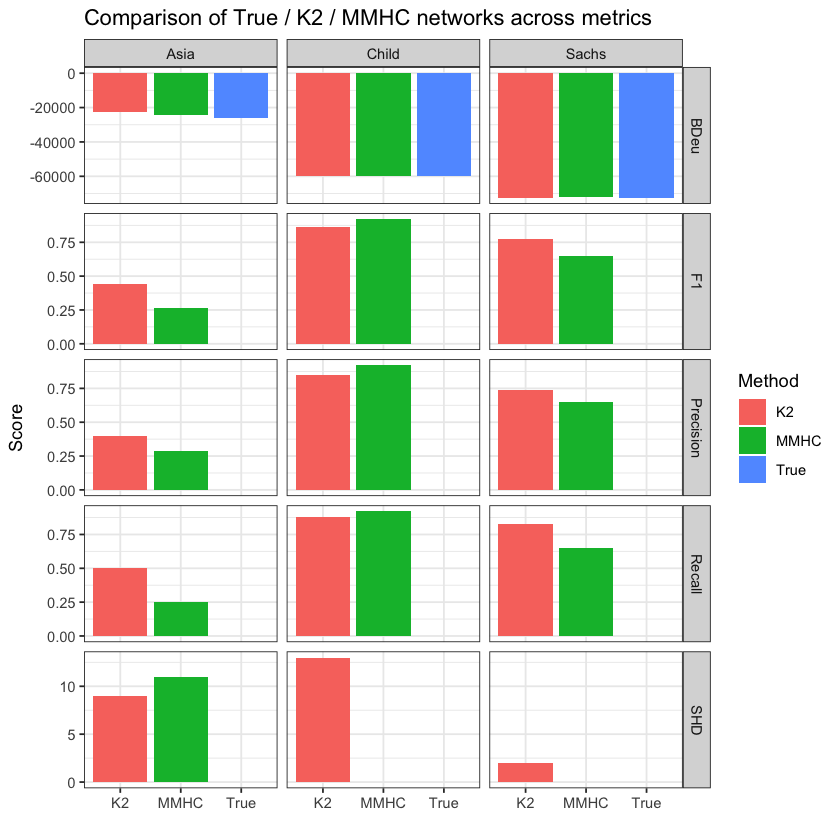

In [32]:
long <- all_scores %>%
  filter(Dataset != "Ruiz") %>% 
  select(Dataset, Method, BDeu, SHD, Precision, Recall, F1) %>%
  pivot_longer(cols = c(BDeu, SHD, Precision, Recall, F1),
               names_to = "Metric",
               values_to = "Value")

ggplot(long, aes(x = Method, y = Value, fill = Method)) +
  geom_col(position = "dodge") +
  facet_grid(Metric ~ Dataset, scales = "free_y") +
  theme_bw() +
  labs(title="Comparison of True / K2 / MMHC networks across metrics",
       y="Score", x="")